In [1]:
import matplotlib.pyplot as plt
import numpy as np


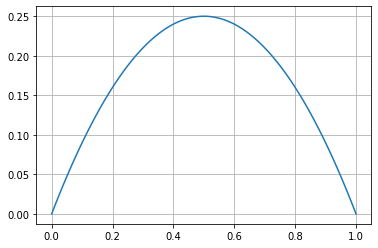

In [2]:
def f(x, lam=1):
    return lam*x*(1-x)

x = np.linspace(0,1,100)
plt.plot(x, f(x))
plt.grid()

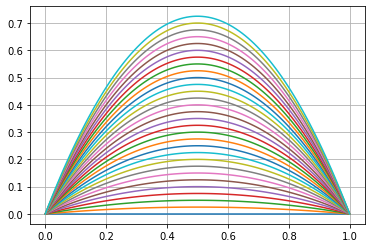

In [3]:
x = np.linspace(0,1,100)
for lam in np.arange(0,3,0.1):
    plt.plot(x, f(x, lam=lam))
    
plt.grid()

In [4]:
def mapRepeat(x, n=1, lam=1):
    for i in range(n):
        x = f(x, lam)
    return x

    

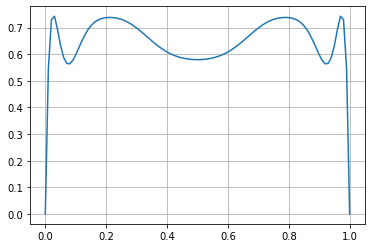

In [5]:
plt.plot(x, mapRepeat(x, 4, 3))
plt.grid()

In [6]:
def getRepeatResults(x, n=1, lam=1):
    results = [x]
    for i in range(n):
        x = f(x, lam)
        results.append(x)
    return results
        

In [20]:
r = getRepeatResults(0.2, 100, lam=3.2)
r[30:40]

[0.7994554904673707,
 0.5130445095326286,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298,
 0.7994554904673701,
 0.5130445095326298]

[0.9,
 0.31499999999999995,
 0.7552125,
 0.6470330294531251,
 0.7993345088744276,
 0.5613959812891682,
 0.8618068671853903,
 0.41683526800122656,
 0.8507926957305026,
 0.4443056961774445,
 0.864143505826023,
 0.4108982750765661,
 0.8472130891548405,
 0.4530507475184347,
 0.8672851869199779,
 0.4028555701420491,
 0.8419703591165079,
 0.4656969572000433,
 0.8708815543913251,
 0.39356405414296103,
 0.8353498630033112,
 0.4813916428428115,
 0.8737880516536868,
 0.3859887235432927,
 0.8295050009424929,
 0.4949925902386071,
 0.8749122404661852,
 0.3830428418201886,
 0.8271235810267591,
 0.5004655695768028,
 0.874999241357392,
 0.38281449143483154,
 0.8269364480381299,
 0.5008939563047391,
 0.8749972029474383,
 0.3828198422355922,
 0.8269408371920798,
 0.5008839114164969,
 0.8749972654521273,
 0.3828196781619937,
 0.8269407026087944,
 0.5008842194218376,
 0.8749972635460491,
 0.3828196831654124,
 0.8269407067129099,
 0.5008842100292207,
 0.8749972636041847,
 0.3828196830128076,
 0.82694070658

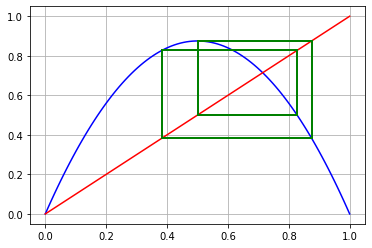

In [24]:
def plotMap(lam=1):
    x = np.linspace(0,1,100)
    plt.plot(x, f(x, lam), 'b-')
    plt.plot(x, x, 'r-')
    plt.grid()
    
def plotResults(x=0.25, lam=1, n=1, start=0):
    r = getRepeatResults(x, n, lam)
    plotMap(lam)
    for x in r[start:]:
        y = f(x,lam)
        plt.plot([x,x],[x,y],'g-')
        plt.plot([x,y],[y,y],'g-')
    return r

plotResults(x=0.9, lam=3.5, n=100, start=-20)
    
    

Text(0, 0.5, 'theta(rad)')

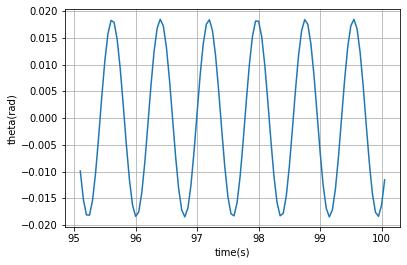

In [36]:
m=1
g=9.8
l=1
beta=0.2

def Torque(theta):
    return -m*g*l*np.sin(theta)

freq = 8
Tdrive = 1

def VerletStep(s, t, derivs, dt):
    dth = dt/2.0  # half of h
    s = s + derivs(s, t, 0)*dth       # changes only positon
    s = s + derivs(s, t+dth, 1)*dt    # changes only velocity
    return s + derivs(s, t+dt, 0)*dth # change only position

def pendDerivs(s, t, step=None):
    theta, omega = s
    if step == 0:
        return np.array([omega, 0])
    else:
        Tau = Torque(theta) + Tdrive*np.sin(freq*t) - beta*omega
        domegadt = Tau/(m*l**2)
        return np.array([0, domegadt])

t = 0
dt = 0.05
theta = np.radians(20)
omega = 0.0

s = np.array([theta, omega])

thetas = [s[0]]
times = [t]

while t < 100:
    s = VerletStep(s, t, pendDerivs, dt)
    t = t + dt
    thetas.append(s[0])
    times.append(t)
    
plt.plot(times[-100:], thetas[-100:] )
plt.grid()
plt.xlabel("time(s)")
plt.ylabel("theta(rad)")

